In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,5)

In [ ]:
# Load dataset (expects dataset1.csv in the same folder)
df = pd.read_csv('dataset1.csv')
df.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [4]:
# Keep relevant columns and drop missing
data = df[['bat_landing_to_food','hours_after_sunset']].copy()
data = data.dropna()
data.describe()

,bat_landing_to_food,hours_after_sunset
count,907.000000,907.000000
mean,11.713134,5.531863
std,27.644410,2.414146
min,0.010238,-0.261667
25%,1.000000,3.779028
50%,4.000000,5.622778
75%,11.500000,7.402778
max,443.000000,12.091944


In [ ]:
# Descriptive stats + correlation
print('Descriptive Statistics for Hesitation Times:')
print(data['bat_landing_to_food'].describe())
corr = data['bat_landing_to_food'].corr(data['hours_after_sunset'])
print(f'\nCorrelation (hesitation vs hours after sunset): {corr:.4f}')

Descriptive Statistics for Hesitation Times:
count    907.000000
mean      11.713134
std       27.644410
min        0.010238
25%        1.000000
50%        4.000000
75%       11.500000
max      443.000000
Name: bat_landing_to_food, dtype: float64

Correlation (hesitation vs hours after sunset): -0.0334


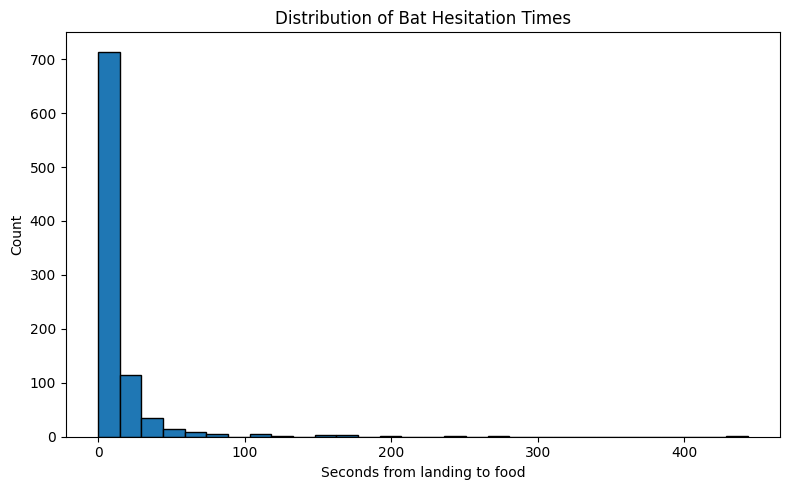

In [7]:
# Histogram
import os
plt.figure()
plt.hist(data['bat_landing_to_food'], bins=30, edgecolor='black')
plt.title('Distribution of Bat Hesitation Times')
plt.xlabel('Seconds from landing to food')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('histogram_hesitation.png', dpi=200)
plt.show()

<Figure size 800x500 with 0 Axes>

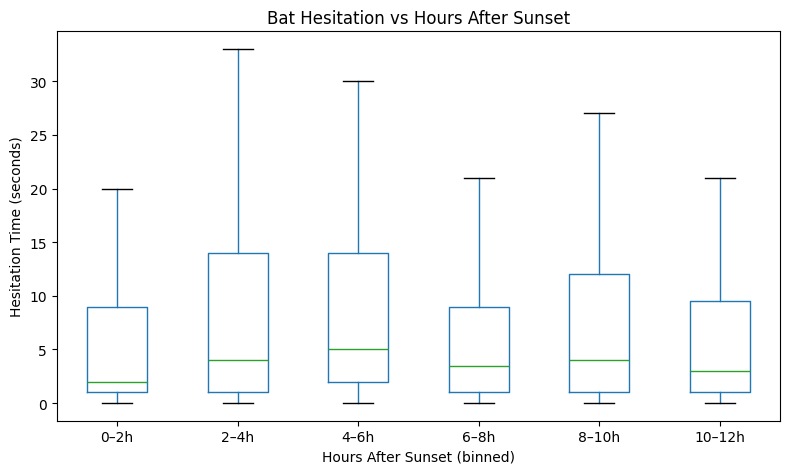

In [8]:
# Boxplot (binned hours)
bins = [0,2,4,6,8,10,12]
labels = ['0–2h','2–4h','4–6h','6–8h','8–10h','10–12h']
data['hours_bin'] = pd.cut(data['hours_after_sunset'], bins=bins, labels=labels, include_lowest=True, right=False)
plt.figure()
data.boxplot(column='bat_landing_to_food', by='hours_bin', grid=False, showfliers=False)
plt.title('Bat Hesitation vs Hours After Sunset')
plt.suptitle('')
plt.xlabel('Hours After Sunset (binned)')
plt.ylabel('Hesitation Time (seconds)')
plt.tight_layout()
plt.savefig('boxplot_hesitation_vs_hours.png', dpi=200)
plt.show()

C:\Users\Richi\AppData\Local\Temp\ipykernel_14812\535260708.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_vals = data.groupby('hours_bin')['bat_landing_to_food'].mean()


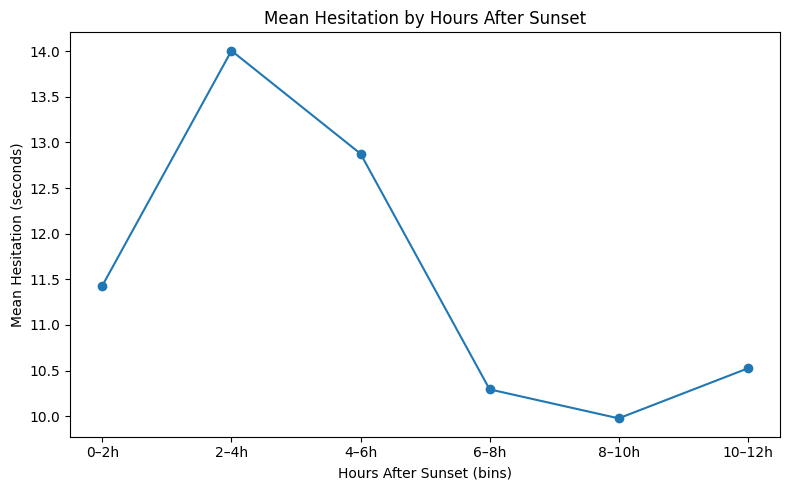

hours_bin
0–2h      11.431423
2–4h      14.005567
4–6h      12.876455
6–8h      10.293644
8–10h      9.975909
10–12h    10.523299
Name: bat_landing_to_food, dtype: float64

In [ ]:
# Line plot (means by bin)
mean_vals = data.groupby('hours_bin')['bat_landing_to_food'].mean()
plt.figure()
plt.plot(mean_vals.index.astype(str), mean_vals.values, marker='o')
plt.title('Mean Hesitation by Hours After Sunset')
plt.xlabel('Hours After Sunset (bins)')
plt.ylabel('Mean Hesitation (seconds)')
plt.tight_layout()
plt.savefig('lineplot_mean_hesitation.png', dpi=200)
plt.show()
mean_vals

**Saved figures**: `histogram_hesitation.png`, `boxplot_hesitation_vs_hours.png`, `lineplot_mean_hesitation.png`